<a href="https://colab.research.google.com/github/juneedpk/vscode-jupyter/blob/master/feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Social_ads.csv')

In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
import seaborn as sns

<Axes: xlabel='EstimatedSalary', ylabel='Age'>

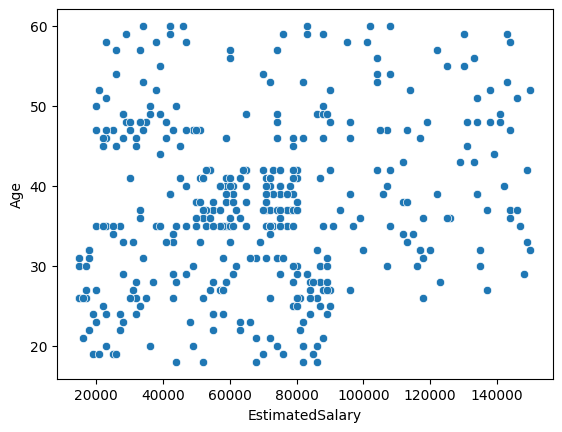

In [10]:
sns.scatterplot(data=df,x='EstimatedSalary',y='Age')

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 191.9093 - accuracy: 0.5406 - val_loss: 1.8435 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 37.5411 - accuracy: 0.5469 - val_loss: 41.6532 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 36.2877 - accuracy: 0.5531 - val_loss: 4.5833 - val_accuracy: 0.3500
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 20.5426 - accuracy: 0.5156 - val_loss: 66.0802 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 38.1035 - accuracy: 0.5281 - val_loss: 79.0124 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 47.4884 - accuracy: 0.5656 - val_loss: 8.1874 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 34.6027 - accuracy: 0.5531 - val_loss: 1.0341 - val_accuracy: 0.5500
E

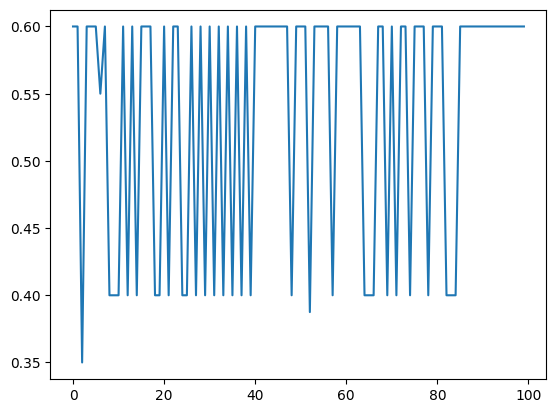

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [19]:
# Applying scaling

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

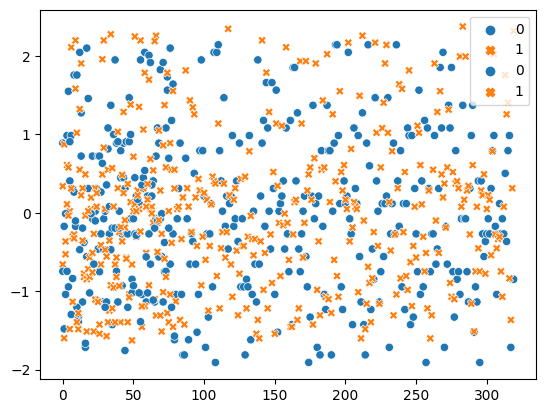

In [33]:
sns.scatterplot(X_train_scaled)
sns.scatterplot(X_test_scaled)

In [34]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 16ms/step - loss: 0.6541 - accuracy: 0.6906 - val_loss: 0.6263 - val_accuracy: 0.7250
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6042 - accuracy: 0.7656 - val_loss: 0.5765 - val_accuracy: 0.7500
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5627 - accuracy: 0.8156 - val_loss: 0.5342 - val_accuracy: 0.7750
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5256 - accuracy: 0.8344 - val_loss: 0.4985 - val_accuracy: 0.7875
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4938 - accuracy: 0.8375 - val_loss: 0.4672 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4652 - accuracy: 0.8531 - val_loss: 0.4397 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4392 - accuracy: 0.8500 - val_loss: 0.4169 - val_accuracy: 0.7875
Epoch 8/100


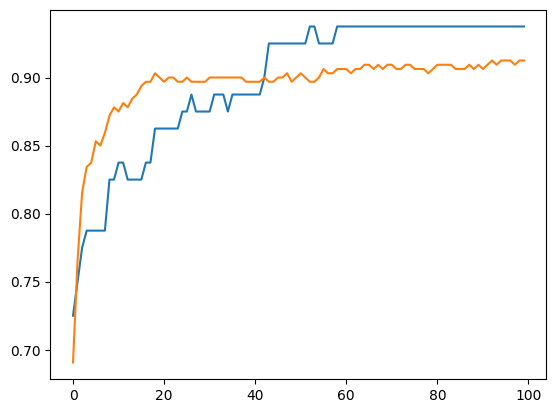

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

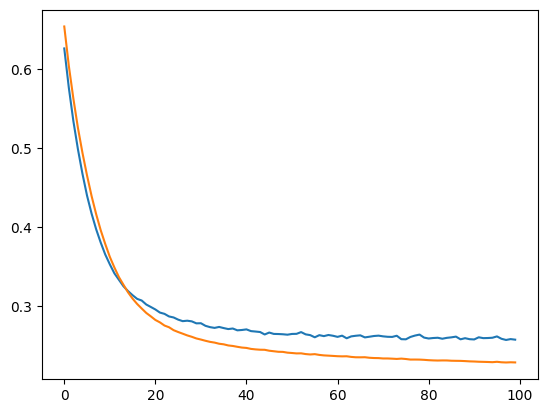

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [39]:
model.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.2572 - accuracy: 0.9375


[0.25715434551239014, 0.9375]